# Initialization of libraries

In [1]:
%matplotlib inline
import os
import sys
import matplotlib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx

from datetime import datetime

matplotlib.style.use('ggplot')

# Manufacturing company emails

### Importing the dataset

In [2]:
# Looking for the dataset
if not os.path.isdir('radoslaw_email'):
    print 'The dataset has not be found'
else:
    # Loading the dataset
    tab = pd.read_csv('radoslaw_email/out.radoslaw_email_email', sep=' ', skiprows=2, header=None, index_col=False)

In [3]:
# Display
tab[:5]

,0,1,2,3,4
0,1,2,NaN,1,1262454010
1,1,3,NaN,1,1262454010
2,1,4,NaN,1,1262454010
3,1,5,NaN,1,1262454010
4,1,6,NaN,1,1262454010


In [4]:
# Keeping desired columns and naming them
tab.drop(2, axis=1, inplace=True)
tab.columns = ['sender', 'receiver', 'weight', 'datetime']

# Date Time format
tab.datetime = pd.to_datetime(tab.datetime,unit='s')

# Display
tab[:5]

,sender,receiver,weight,datetime
0,1,2,1,2010-01-02 17:40:10
1,1,3,1,2010-01-02 17:40:10
2,1,4,1,2010-01-02 17:40:10
3,1,5,1,2010-01-02 17:40:10
4,1,6,1,2010-01-02 17:40:10


### Quick Data Analysis

In [5]:
print '%d mails exchanged between %d employees from %s to %s' %(tab.shape[0], len(pd.unique(pd.concat([tab.sender,tab.receiver]))), str(min(tab.datetime.dt.date)), str(max(tab.datetime.dt.date))) 

82927 mails exchanged between 167 employees from 2010-01-02 to 2010-09-30


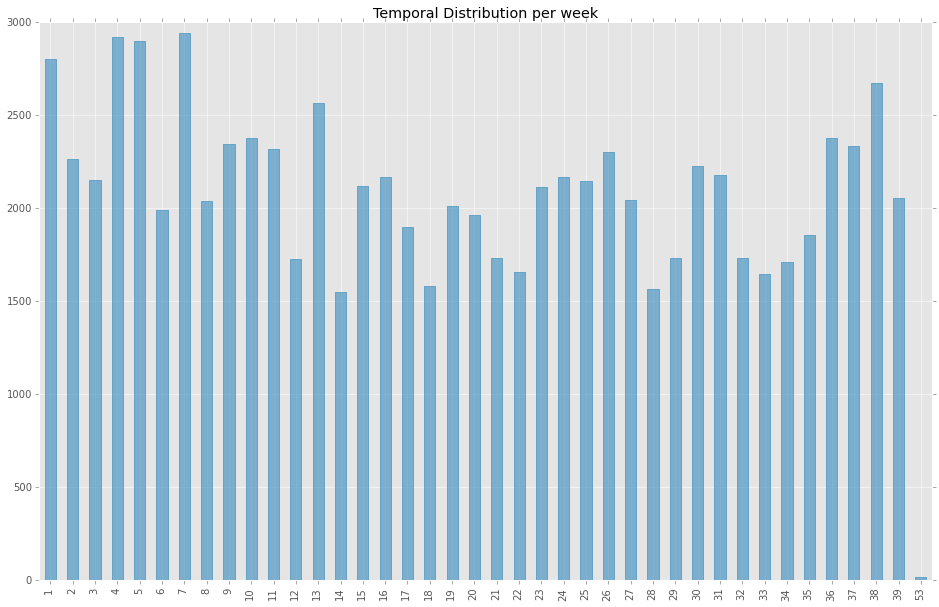

In [6]:
tab.datetime.groupby(tab.datetime.dt.week).count().plot(
    title='Temporal Distribution per week',
    kind='bar',
    figsize=(16, 10),
    color='#348ABD',
    alpha=0.6,
    lw='1',
    edgecolor='#348ABD',
    grid=True)

### Creating a graph (Dipou's Birthday example)

In [7]:
dipou_brthd = datetime.strptime('2010-01-19', '%Y-%m-%d')

In [8]:
row_list = tab.datetime.dt.date == dipou_brthd.date()
edge_list = zip(tab.sender[row_list], tab.receiver[row_list])

G=nx.Graph()
G.add_edges_from(edge_list)

In [9]:
print '%d mails exchanged between %d employees the %s' %(nx.number_of_edges(G), nx.number_of_nodes(G), str(dipou_brthd.date()))

174 mails exchanged between 86 employees the 2010-01-19


C:\Users\Sacha\Anaconda\lib\site-packages\matplotlib\collections.py:650: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors_original != str('face'):
C:\Users\Sacha\Anaconda\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


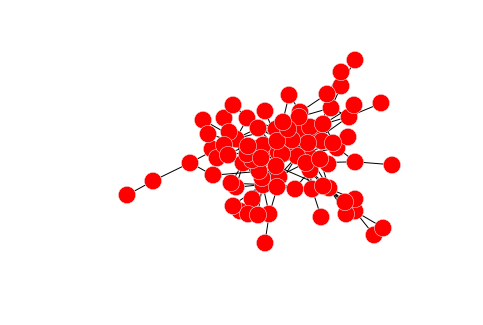

In [10]:
nx.draw(G)

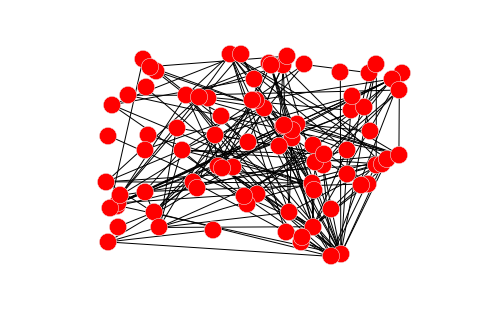

In [11]:
nx.draw_random(G)

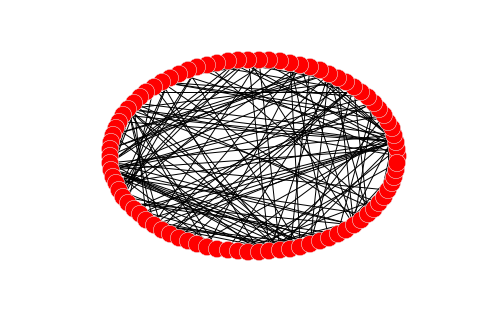

In [12]:
nx.draw_circular(G)

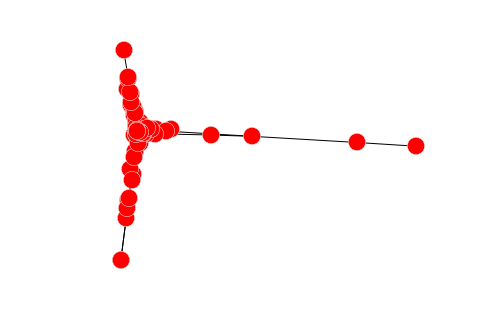

In [13]:
nx.draw_spectral(G)